In [1]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import matplotlib.patches as patches

In [2]:
gridworld = np.array([
    ['R', 'R', 'H', 'R', 'R'],
    ['R', 'H', 'H', 'R', 'R'],
    ['R', 'R', 'H', 'H', 'R'],
    ['R', 'H', 'R', 'H', 'R'],
    ['R', 'R', 'R', 'R', 'G']
])

rewards = {

    'G': 10,
    'H': -10,
    'R': -1

}

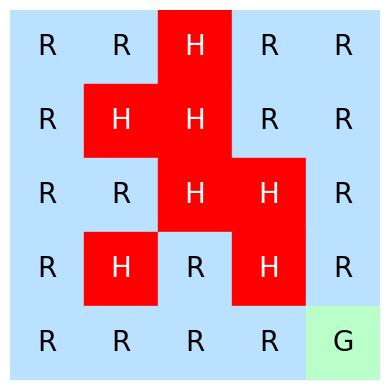

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
# Create a color map
# Create a color map with lighter colors
color_map = {'H': '#FF0000',  # Darker red
             'G': '#BAFFC9',  # Light green
             'R': '#BAE1FF'}  # Light blue
# Iterate through the grid and color cells
for (i, j), value in np.ndenumerate(gridworld):
    color = color_map[value]
    ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, fill=True, color=color))

# Set the limits of the plot

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
# Remove the axes
ax.set_axis_off()
# Add grid lines
ax.grid(which='major', axis='both', linestyle='-', color='gray', linewidth=1)
# Add text labels to each cell

for (i, j), value in np.ndenumerate(gridworld):
    # Use white text for red cells, black for others
    text_color = 'white' if value == 'H' else 'black'
    ax.text(j + 0.5, 4 - i + 0.5, value, ha='center', va='center', fontsize=20, color=text_color)
# Set the title
# plt.title('Gridworld Visualization', fontsize=16)
# Show the plot
plt.tight_layout()
plt.show()

In [239]:
def policy_visualize(policy, gridworld):
    fig, ax = plt.subplots(figsize=(5, 5))
    # Set the limits of the plot
    ax.set_xlim(0, 5)
    ax.set_ylim(5, 0)  # Reversed y-axis
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    # Draw grid lines
    for i in range(6):
        ax.axhline(y=i, color='gray', linestyle='-', linewidth=0.5)
        ax.axvline(x=i, color='gray', linestyle='-', linewidth=0.5)
    # Dictionary to map directions to arrow symbols
    direction_to_arrow = {
        'up': '↑',
        'down': '↓',
        'left': '←',
        'right': '→'
    }
    # Color mapping
    color_map = {'H': 'red', 'R': 'lightblue', 'G': 'lightgreen'}
    # Plot arrows and cell coordinates for each cell
    for y in range(5):
        for x in range(5):
            # Color the cell based on gridworld
            cell_type = gridworld[y, x]
            rect = patches.Rectangle((x, y), 1, 1, facecolor=color_map[cell_type])
            ax.add_patch(rect)
            # Plot cell coordinates
            ax.text(x + 0.1, y + 0.2, f'{y},{x}', ha='left', va='top', fontsize=10)
            # Plot arrow if the cell is in the policy and not (4,4)
            if (y, x) in policy and (y, x) != (4, 4):
                direction = policy[(y, x)]
                if direction in direction_to_arrow:
                    arrow = direction_to_arrow[direction]
                    ax.text(x + 0.5, y + 0.6, arrow, ha='center', va='center', fontsize=8)
    # Show the plot
    plt.title("Policy Visualization with Cell Coordinates")
    plt.tight_layout()
    plt.show()

### Start cell of an episode

In [240]:
terminal_state = (4, 4)

rows = 5
cols = 5

# Function to select a random tuple from the grid, excluding the terminal state
def select_random_tuple():
    while True:
        # Generate random row and column indices
        row = random.randint(0, rows - 1)
        col = random.randint(0, cols - 1)
        # Check if the generated tuple is not the terminal state
        if (row, col) != terminal_state:
            return (row, col)
# Example usage

## Play an episode

In [ ]:
import random

def epsilon_greedy(r,c, policy, thresh):
  if random.random()<thresh:
    dir = np.random.choice(['up', 'down', 'left', 'right'])
  else:
    dir = policy[(r,c)]


  row = r
  col = c
  if dir == 'up': 
            if row-1>=0:
                next_cell = (row-1, col)
            else:
                next_cell = (row, col)

  elif dir == 'down':
            if row+1<=len(gridworld)-1:
                next_cell = (row+1, col)
            else:
                next_cell = (row, col)

  elif dir == 'right':
            if col+1<=len(gridworld[0])-1:
                next_cell = (row, col+1)
            else:
                next_cell = (row, col)
            

  elif dir == 'left':
            if col-1<0:
                next_cell = (row,col)
            else:
                next_cell = (row, col-1)

  return next_cell

In [242]:
def play_episode(policy):

    current_cell = select_random_tuple()
    
    epi_track = []

    for i in range(L): 
        row, col = current_cell

        if current_cell == (4,4):
            break  

        next_cell = epsilon_greedy(row, col, policy, thresh)

        
        state[row][col] = state[row][col]+alpha*(rewards[gridworld[row][col]]+gamma*state[next_cell[0]][next_cell[1]]- state[row][col])

        current_cell = next_cell

    return epi_track

### Update policy

In [243]:
def update_policy(temp, policy):
    for row in range(len(temp)):
        for col in range(len(temp[0])):

            if row==4 and col==4:
                continue

            maxi = [-np.inf, None]

            if row-1>=0 and rewards[gridworld[row][col]]+gamma*temp[row-1][col]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row-1][col], "up"] 

            if row+1<=len(temp)-1 and rewards[gridworld[row][col]]+gamma*temp[row+1][col]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row+1][col] , "down"]  

            if col-1>=0 and rewards[gridworld[row][col]]+gamma*temp[row][col-1]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row][col-1], "left"]    
                  
            if col+1<=len(temp[0])-1 and rewards[gridworld[row][col]]+gamma*temp[row][col+1]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row][col+1], "right"] 

            policy[(row, col)] = maxi[1]

    return policy

In [244]:
def check_policy_change(dict1, dict2):
    if dict1.keys() != dict2.keys():
        return "No"
    for key in dict1.keys():
        if dict1[key] != dict2[key]:
            return "No"
    return "Yes"

### Initialise policy

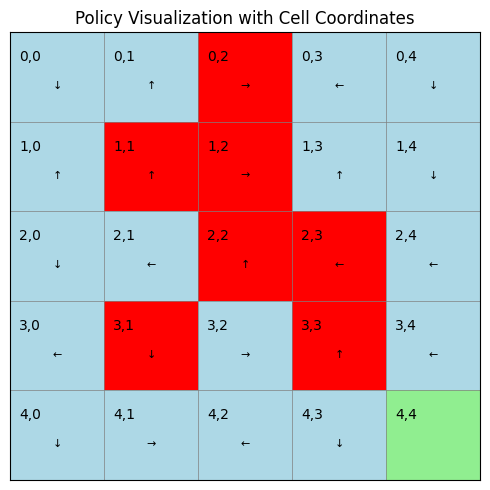

In [280]:


policy = {}
for row in range(gridworld.shape[0]):
  for col in range(gridworld.shape[1]):
    action = np.random.choice(['up', 'down', 'left', 'right'])
    policy[(row, col)] = action
policy_visualize(policy, gridworld)

In [281]:
L = 10
alpha = 0.5
gamma = 0.8
thresh = 0.12

state = np.zeros(gridworld.shape)
state[4,4] = 10

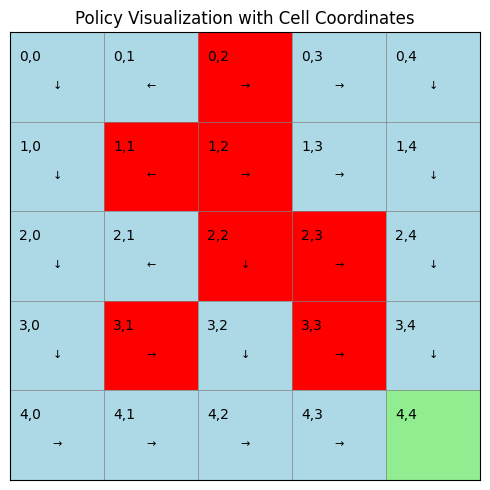

In [ ]:
for m in range(30):
    d = {}

    old_policy = policy.copy()

    for n in range(50):

        ep = play_episode(policy)
        
    policy = update_policy(state, policy)

    if check_policy_change(old_policy, policy) == 'Yes':
        print("converged after ", m, "iterations")
        break


policy_visualize(policy, gridworld)